<a href="https://colab.research.google.com/github/talhaanwarch/ODIR2019/blob/master/submissions/sub5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#connect drive with colab notebook/

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install scikit-multilearn


     |████████████████████████████████| 92kB 2.8MB/s 


https://github.com/keras-team/keras/issues/8130
https://stackoverflow.com/questions/56796331/how-to-input-multiple-images-with-flow-from-dataframe-in-keras

In [3]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5163 sha256=437d3a40924712407bc8fb780a9bbccd3f41c3708895d8504b4f45d5e4fb169e
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
import pandas as pd
import numpy as np
import cv2

In [0]:

#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/ghina/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
Archive(path+'ODIR-5K_Testing_Images.7z').extractall('data')


In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:

#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O)

In [11]:
#print first 5 rows of annotation file
annotation=annotation.sample(frac=1)
annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3059,4199,67,Female,4199_left.jpg,4199_right.jpg,moderate non proliferative retinopathy，hyperte...,hypertensive retinopathy,0,1,0,0,0,1,0,0
591,592,61,Male,592_left.jpg,592_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy，laser spot,0,1,0,0,0,0,0,1
585,586,64,Female,586_left.jpg,586_right.jpg,lens dust，epiretinal membrane,lens dust，spotted membranous change,0,0,0,0,0,0,0,1
765,767,61,Female,767_left.jpg,767_right.jpg,epiretinal membrane,macular epiretinal membrane,0,0,0,0,0,0,0,1
87,87,41,Female,87_left.jpg,87_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [0]:
# X=annotation.iloc[:,0:-8]
# y=annotation.iloc[:,-8::]
# #y.head()
# #X.head()

In [0]:
# from skmultilearn.model_selection import iterative_train_test_split
# X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.5)


In [0]:
train_annotation=annotation[0:3000]
val_annotation=annotation[3000:3500]


In [14]:
train_annotation.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
3059,4199,67,Female,4199_left.jpg,4199_right.jpg,moderate non proliferative retinopathy，hyperte...,hypertensive retinopathy,0,1,0,0,0,1,0,0
591,592,61,Male,592_left.jpg,592_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy，laser spot,0,1,0,0,0,0,0,1
585,586,64,Female,586_left.jpg,586_right.jpg,lens dust，epiretinal membrane,lens dust，spotted membranous change,0,0,0,0,0,0,0,1
765,767,61,Female,767_left.jpg,767_right.jpg,epiretinal membrane,macular epiretinal membrane,0,0,0,0,0,0,0,1
87,87,41,Female,87_left.jpg,87_right.jpg,moderate non proliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0


In [0]:
for i in ['G',	'C',	'A',	'H',	'M']:
  duplicate=train_annotation[train_annotation[i]==1]
  train_annotation=train_annotation.append([duplicate]*3,ignore_index=True)

In [0]:

# train_annotation.drop(columns=['ID', 'Patient Age', 'Patient Sex','Left-Diagnostic Keywords', 'Right-Diagnostic Keywords'],inplace=True)
# val_annotation.drop(columns=['ID', 'Patient Age', 'Patient Sex','Left-Diagnostic Keywords', 'Right-Diagnostic Keywords'],inplace=True)

# def change_name(x):
#   l=list(x)
#   l.insert(l.index('_'),'_1')
#   l=''.join(l)
#   return l
# def df_row_duplicate(df):
#   for i in range(len(df)):
#     left=change_name(df.iloc[i,0]) #creat new image name

#     img_left=Image.open('/content/data/ODIR-5K_Training_Dataset/{}'.format(df.iloc[i,0]))
#     img_left = img_left.save('/content/data/ODIR-5K_Training_Dataset/{}'.format(img_left)) 

#     right=change_name(df.iloc[i,1])
#     img_right=Image.open('/content/data/ODIR-5K_Training_Dataset/{}'.format(df.iloc[i,1]))
#     img_right = img_right.save('/content/data/ODIR-5K_Training_Dataset/{}'.format(img_right)) 

#     label=list(df.iloc[i,-8::])
#     new_list=[left,right]+label
#     df=df.append(pd.Series(new_list,index=['Left-Fundus',	'Right-Fundus','N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']),ignore_index=True)
#   return df

In [17]:
len(train_annotation)

5520

In [0]:
img_shape=256*1

In [0]:
#https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [0]:
def load_ben_color(image, sigmaX=10):
    #image = cv2.imread(path)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (img_shape, img_shape))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    
    
    return image

In [0]:
from keras_preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    preprocessing_function=load_ben_color
)

val_data_gen= ImageDataGenerator(
    rescale=1/255
    
)

In [0]:
batch_size=20
def get_flow_from_dataframe(generator, dataframe,directory_path,
                            image_shape=(img_shape, img_shape),
                            #subset='training',
                             batch_size=batch_size):
    train_generator_1 = generator.flow_from_dataframe(dataframe,
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Left-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      #subset=subset
                                                      )

    train_generator_2 = generator.flow_from_dataframe(dataframe, 
                                                      directory=directory_path,
                                                      target_size=(img_shape,img_shape),
                                                      x_col="Right-Fundus",
                                                      y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                      class_mode='other',
                                                      shuffle=False,
                                                      batch_size=batch_size,
                                                      seed=7,
                                                      #subset=subset
                                                      )
    while True:
        x_1 = train_generator_1.next()
        x_2 = train_generator_2.next()

        yield [x_1[0], x_2[0]], x_1[1]

In [23]:
train_generator_1 = train_data_gen.flow_from_dataframe(train_annotation,
                                                  directory="data/ODIR-5K_Training_Dataset/",
                                                  target_size=(img_shape,img_shape),
                                                  x_col="Left-Fundus",
                                                  y_col=['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O'],
                                                  class_mode='other',
                                                  shuffle=False,
                                                  batch_size=batch_size,
                                                  seed=7,
                                                  #subset=subset
                                                  )

Found 5520 validated image filenames.


In [24]:
train_generator_1.next()[0].shape

(20, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


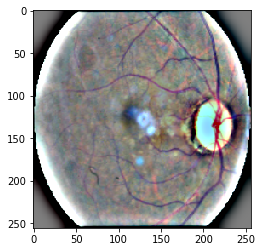

In [25]:
import matplotlib.pyplot as plt
plt.imshow(train_generator_1.next()[0][1])

In [0]:
batch_size=50
train_gen = get_flow_from_dataframe(train_data_gen, train_annotation, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)
valid_gen = get_flow_from_dataframe(val_data_gen, val_annotation, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Training_Dataset/",batch_size=batch_size)

In [27]:
img_shape

256

In [28]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [29]:
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3

import keras
left_input=Input(shape=(img_shape,img_shape,3))
right_input=Input(shape=(img_shape,img_shape,3))

left_model = VGG16(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet')
right_model = VGG16(input_shape =  (img_shape,img_shape,3), include_top = False, weights = 'imagenet')

left_model.trainable = False
right_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [30]:
pt_depth = left_model.get_output_shape_at(0)[-1]
pt_depth

512

In [0]:
left_model_features = left_model(left_input)
right_model_features = right_model(right_input)
# left_model_features=left_model.output
# right_model_features=right_model.output

In [0]:
left_bn_features = BatchNormalization()(left_model_features)
right_bn_features = BatchNormalization()(right_model_features)


In [0]:
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
def attention(bn):
  attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn)
  attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
  attn_layer = LocallyConnected2D(1, kernel_size = (1,1), padding = 'valid', activation = 'sigmoid')(attn_layer)
  up_c2_w = np.ones((1, 1, 1, pt_depth))
  up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', activation = 'linear', use_bias = False, weights = [up_c2_w])
  up_c2.trainable = False
  attn_layer = up_c2(attn_layer)
  mask_features = multiply([attn_layer, bn])
  gap_features = GlobalAveragePooling2D()(mask_features)
  gap_mask = GlobalAveragePooling2D()(attn_layer)
  # to account for missing values from the attention model
  gap = Lambda(lambda x: x[0]/x[1])([gap_features, gap_mask])

  return gap

In [0]:
left_atten=attention(left_bn_features)
right_atten=attention(right_bn_features)

In [0]:
con = concatenate([left_atten, right_atten])
gap_dr = Dropout(0.5)(con)
dr_steps = Dropout(0.25)(gap_dr)
fc=Dense(128, activation = 'elu')(dr_steps)
out = Dense(8, activation = 'sigmoid')(dr_steps)


In [0]:

for layer in right_model.layers:
        layer.name = layer.name + '_right'
for layer in left_model.layers:
  layer.name = layer.name + '_left'

left_model.name="left_vgg16"
right_model.name="right_vgg16"

In [0]:
model =Model(inputs=[left_input, right_input], outputs=out)


In [38]:
left_model.summary()

Model: "left_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3_left (InputLayer)    (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1_left (Conv2D)   (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2_left (Conv2D)   (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool_left (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1_left (Conv2D)   (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2_left (Conv2D)   (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool_left (MaxPooling (None, 64, 64, 128)       0

In [0]:
import keras.backend as K
def focal_loss(y_true, y_pred, alpha = 0.75, gamma = 3):
  alpha_factor = K.ones_like(y_true) * alpha
  alpha_factor = tf.where(K.equal(y_true, 1), alpha_factor, 1 - alpha_factor)
  focal_weight = tf.where(K.equal(y_true, 1), 1 - y_pred, y_pred)
  focal_weight = alpha_factor * focal_weight ** gamma
  loss = focal_weight * K.binary_crossentropy(y_true, y_pred)
  return loss

In [0]:
model.compile('Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
step_size_train=len(train_annotation)/batch_size
step_size_val=len(val_annotation)/batch_size


In [0]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.000001, verbose=1)

In [43]:
model.fit_generator(train_gen, epochs=10,
                        steps_per_epoch=step_size_train,
                        use_multiprocessing=True,
                        validation_data=valid_gen,
                        validation_steps=step_size_val,
                        verbose=2,callbacks=[reduce_lr]
                   # class_weight=[0.5,0.5,1.5,1.5,1.5,2.5,1.5,0.5]
                    
                        )

Epoch 1/10
Found 500 validated image filenames.
Found 500 validated image filenames.
Found 5520 validated image filenames.
Found 5520 validated image filenames.
 - 880s - loss: 0.5396 - acc: 0.7655 - val_loss: 0.5264 - val_acc: 0.8385
Epoch 2/10
 - 863s - loss: 0.4731 - acc: 0.8238 - val_loss: 0.4671 - val_acc: 0.8400
Epoch 3/10
 - 864s - loss: 0.4558 - acc: 0.8284 - val_loss: 0.4840 - val_acc: 0.8147
Epoch 4/10
 - 856s - loss: 0.4557 - acc: 0.8273 - val_loss: 0.4471 - val_acc: 0.8172
Epoch 5/10
 - 855s - loss: 0.4436 - acc: 0.8307 - val_loss: 0.4536 - val_acc: 0.8142
Epoch 6/10
 - 862s - loss: 0.4392 - acc: 0.8319 - val_loss: 0.4554 - val_acc: 0.8075

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
 - 858s - loss: 0.4309 - acc: 0.8354 - val_loss: 0.4387 - val_acc: 0.8305
Epoch 8/10
 - 831s - loss: 0.4178 - acc: 0.8369 - val_loss: 0.4313 - val_acc: 0.8325
Epoch 9/10
 - 835s - loss: 0.4116 - acc: 0.8375 - val_loss: 0.4293 - val_acc: 0.8305
Epoc

In [44]:
y_pred = model.predict_generator(valid_gen,steps=step_size_val)


Found 500 validated image filenames.
Found 500 validated image filenames.


In [0]:
y_pred1=y_pred.copy()
y_pred1[y_pred1>=0.5] = 1
y_pred1[y_pred1<0.5] = 0
y_pred1=y_pred1.astype(int)

In [46]:
y_true=val_annotation.iloc[:,-8::].values
y_true.shape

(500, 8)

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_true, y_pred1)

array([[[352,   0],
        [148,   0]],

       [[321,   0],
        [179,   0]],

       [[468,   0],
        [ 32,   0]],

       [[382,  92],
        [  5,  21]],

       [[475,   0],
        [ 25,   0]],

       [[482,   0],
        [ 18,   0]],

       [[468,   0],
        [ 32,   0]],

       [[354,   0],
        [146,   0]]])

In [48]:
target_names = ['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00       148
           D       0.00      0.00      0.00       179
           G       0.00      0.00      0.00        32
           C       0.19      0.81      0.30        26
           A       0.00      0.00      0.00        25
           H       0.00      0.00      0.00        18
           M       0.00      0.00      0.00        32
           O       0.00      0.00      0.00       146

   micro avg       0.19      0.03      0.06       606
   macro avg       0.02      0.10      0.04       606
weighted avg       0.01      0.03      0.01       606
 samples avg       0.04      0.04      0.04       606



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
import glob
name=glob.glob("/content/data/ODIR-5K_Testing_Images/*.jpg")
name[0]

'/content/data/ODIR-5K_Testing_Images/1110_left.jpg'

In [50]:
test=pd.read_csv(path+'XYZ_ODIR.csv')
print(len(test))
test.head()

500


,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [51]:
left_test=[]
right_test=[]
ID=[]
for i in test['ID']:
  ID.append(i)
  left_test.append(str(i)+'_left.jpg')
  right_test.append(str(i)+'_right.jpg')

name_df=pd.DataFrame(zip(ID,left_test,right_test),columns=['ID','Left-Fundus','Right-Fundus'])
name_df.head()

,ID,Left-Fundus,Right-Fundus
0,937,937_left.jpg,937_right.jpg
1,967,967_left.jpg,967_right.jpg
2,988,988_left.jpg,988_right.jpg
3,995,995_left.jpg,995_right.jpg
4,1000,1000_left.jpg,1000_right.jpg


In [52]:
result = pd.merge(name_df, test, on='ID')
result.head()

,ID,Left-Fundus,Right-Fundus,N,D,G,C,A,H,M,O
0,937,937_left.jpg,937_right.jpg,0,0,0,0,0,0,0,0
1,967,967_left.jpg,967_right.jpg,0,0,0,0,0,0,0,0
2,988,988_left.jpg,988_right.jpg,0,0,0,0,0,0,0,0
3,995,995_left.jpg,995_right.jpg,0,0,0,0,0,0,0,0
4,1000,1000_left.jpg,1000_right.jpg,0,0,0,0,0,0,0,0


In [0]:
test_gen = get_flow_from_dataframe(val_data_gen, result, image_shape=(img_shape, img_shape),
                                        directory_path="data/ODIR-5K_Testing_Images/",batch_size=batch_size)

In [54]:
y_test= model.predict_generator(test_gen,steps=len(test)/batch_size)


Found 500 validated image filenames.
Found 500 validated image filenames.


In [55]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0,0,0,0,0,0,0,0
1,967,0,0,0,0,0,0,0,0
2,988,0,0,0,0,0,0,0,0
3,995,0,0,0,0,0,0,0,0
4,1000,0,0,0,0,0,0,0,0


In [0]:
for i,j in enumerate(['N'	,'D'	,'G',	'C',	'A'	,'H'	,'M',	'O']):
  test[j]=y_test[:,i]

In [57]:
test.head()

,ID,N,D,G,C,A,H,M,O
0,937,0.141622,0.228273,0.159483,0.438329,0.111116,0.088060,0.080589,0.156212
1,967,0.288029,0.281495,0.173414,0.134373,0.283918,0.155456,0.166688,0.161617
2,988,0.115884,0.205913,0.111852,0.677194,0.053209,0.054359,0.119919,0.175474
3,995,0.253277,0.167976,0.133234,0.182195,0.172133,0.077616,0.145206,0.140713
4,1000,0.108653,0.212448,0.131301,0.650052,0.079794,0.087380,0.083467,0.150538


In [0]:
test.to_csv('/content/TAC_ODIR.csv',index=False)

In [0]:
#keras.backend.clear_session()
